In [ ]:
!pip install jupyter-websocket-proxy

ERROR: Could not find a version that satisfies the requirement jupyter-websocket-proxy (from versions: none)
ERROR: No matching distribution found for jupyter-websocket-proxy


In [ ]:
!jupyter-notebook --websocket-proxy

usage: jupyter-notebook [-h] [--debug] [--show-config] [--show-config-json] [--generate-config]
                        [-y] [--no-browser] [--no-mathjax] [--allow-root] [--autoreload]
                        [--script] [--no-script] [--log-level NotebookApp.log_level]
                        [--config NotebookApp.config_file] [--ip NotebookApp.ip]
                        [--port NotebookApp.port] [--port-retries NotebookApp.port_retries]
                        [--sock NotebookApp.sock] [--sock-mode NotebookApp.sock_mode]
                        [--transport KernelManager.transport] [--keyfile NotebookApp.keyfile]
                        [--certfile NotebookApp.certfile] [--client-ca NotebookApp.client_ca]
                        [--notebook-dir NotebookApp.notebook_dir] [--browser NotebookApp.browser]
                        [--pylab [NotebookApp.pylab]] [--gateway-url GatewayClient.url]
                        [extra_args ...]
jupyter-notebook: error: unrecognized arguments: --webso

In [ ]:
try:
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1]) >= 12, "torch version should be 1.12+"
    assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    !pip3 install -U --pre torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/nightly/cu113
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")

[INFO] torch/torchvision versions not as required, installing nightly versions.
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/nightly/cu113
  ERROR: HTTP error 403 while getting https://download.pytorch.org/whl/nightly/nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (from https://download.pytorch.org/whl/nightly/cu113/nvidia-cuda-nvrtc-cu12/)
ERROR: Could not install requirement nvidia-cuda-nvrtc-cu12==12.1.105 from https://download.pytorch.org/whl/nightly/nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (from torch) because of HTTP error 403 Client Error: Forbidden for url: https://download.pytorch.org/whl/nightly/nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl for URL https://download.pytorch.org/whl/nightly/nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (from https://download.pytorch.org/whl/nightly/cu113/nvidia-cuda-nvrtc-cu12/)
torch version: 2.3.1+cu121
torchvision version: 0.18.1+cu121


In [ ]:
import torch
import torchvision
from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

[INFO] Couldn't find torchinfo... installing it.


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
import pandas as pd
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os
from google.colab import drive
import shutil
from sklearn.model_selection import train_test_split
from torchvision.transforms import Compose, ToTensor, Resize, Normalize
import zipfile

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


after dataset issues are sorted

In [ ]:
train_dir = '/content/drive/My Drive/Logos2K/train'
test_dir = '/content/drive/My Drive/Logos2K/test'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
import re

def create_df_from_directory(directory):
    """
    Creates a DataFrame with logoName and fileName from images in a directory.

    Args:
    - directory: The root directory containing images.

    Returns:
    - DataFrame with columns 'logoName' and 'fileName'.
    """
    data = []
    # Define a regex pattern to identify the position of the last hyphen before the number and extension
    pattern = re.compile(r'(.+)-(\d+)\.(jpg|png)$')

    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('.jpg', '.png')):
                # Extract logo name and file name
                match = pattern.match(file)
                if match:
                    logo_name = match.group(1)  # Extract logoName
                    file_name = file  # Full file name
                    data.append({'logoName': logo_name, 'fileName': file_name})

    return pd.DataFrame(data)

In [ ]:
# Create DataFrames for train and test images
train_df = create_df_from_directory(train_dir)
test_df = create_df_from_directory(test_dir)

# Save the combined DataFrame to a CSV file
df = pd.concat([train_df, test_df], ignore_index=True)
df.to_csv('/content/LogoDatabase.csv', index=False)

In [ ]:
train_df

""


In [ ]:
test_df

,logoName,fileName
0,PG Tips,PG Tips-11.jpg
1,Pixian,Pixian-11.jpg
2,Pik-Nik,Pik-Nik-1.jpg
3,Pfanni,Pfanni-15.jpg
4,Pibb Xtra,Pibb Xtra-24.jpg
...,...,...
2336,HS,HS-12.jpg
2337,Hummel,Hummel-10.jpg
2338,Hurley,Hurley-10.jpg
2339,Ibex,Ibex-1.jpg


In [ ]:
file_path = '/content/LogoDatabase.csv'
drive_folder = '/content/drive/My Drive/Logos2K/LogoDatabase.csv'
shutil.copy(file_path, drive_folder)

'/content/drive/My Drive/Logos2K/LogoDatabase.csv'

move to training

Don't run this after uploading train and test dataset to Drive

In [ ]:
drive_path = '/content/drive/My Drive/Logos2K'
colab_path = '/content'
logo2k_path = os.path.join(drive_path, 'Logo-2K+.zip')
list_path = os.path.join(drive_path, 'List.zip')
train_test_path = os.path.join(drive_path, 'train_and_test.zip')

In [ ]:
def unzip_file(zip_path, extract_path):
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print(f"Successfully unzipped {zip_path}")
    except zipfile.BadZipFile:
        print(f"Error: {zip_path} is not a valid zip file")
    except Exception as e:
        print(f"An error occurred while unzipping {zip_path}: {e}")

if not os.path.exists(os.path.join(colab_path, 'Logo-2K+')):
    unzip_file(logo2k_path, colab_path)
if not os.path.exists(os.path.join(colab_path, 'List')):
    unzip_file(list_path, colab_path)
if not os.path.exists(os.path.join(colab_path, 'train_and_test')):
    unzip_file(train_test_path, colab_path)

Successfully unzipped /content/drive/My Drive/Logos2K/Logo-2K+.zip
Successfully unzipped /content/drive/My Drive/Logos2K/List.zip
Successfully unzipped /content/drive/My Drive/Logos2K/train_and_test.zip


In [ ]:
# Paths after extraction
logo2k_dir = os.path.join(colab_path, 'Logo-2K+')
list_dir = os.path.join(colab_path, 'List')
train_test_dir = os.path.join(colab_path, 'train_and_test')

# Paths for train and test image lists
train_images_root_path = os.path.join(list_dir, 'train_images_root.txt')
test_images_root_path = os.path.join(list_dir, 'test_images_root.txt')

#train and test dorectories
#train_dir = "/content/train"
#test_dir = "/content/test"

In [ ]:
# Read image paths from files
def read_image_paths(file_path):
    with open(file_path, 'r') as file:
        return [line.strip() for line in file.readlines()]

train_image_paths = read_image_paths('/content/train_images_root.txt')

In [ ]:
def copy_images_with_selection(image_paths, destination_dir, source_root, existing_train_images):
    """
    Copies one image per subclass to the test directory if it's not already in the train directory.

    Args:
    - image_paths: List of image paths to copy.
    - destination_dir: Directory to copy images into.
    - source_root: Root directory to find source images.
    - existing_train_images: Set of images already in the train directory to avoid duplication.

    Returns:
    - Number of testing images copied.
    """
    test_count = 0
    subclasses_added = set()

    for path in image_paths:
        # Extract subclass and number from the path
        parts = path.split('/')
        subclass = parts[1]
        number = os.path.splitext(parts[-1])[0]  # Remove extension
        new_name = f"{subclass}-{number}.jpg"  # Assuming images are jpg; change extension if needed

        # Skip if this subclass already has an image in the test directory
        if subclass in subclasses_added:
            continue

        # Skip if the image is already present in the train directory
        if new_name in existing_train_images:
            continue

        # Add the subclass to the set to ensure only one image per subclass
        subclasses_added.add(subclass)

        # Determine the full source path
        source_path = os.path.join(source_root, path)
        if os.path.exists(source_path):
            dest_path = os.path.join(destination_dir, new_name)
            shutil.copy(source_path, dest_path)
            test_count += 1
        else:
            print(f"Warning: {path} does not exist in {source_root}.")

    return test_count

In [ ]:
import re
import shutil
import os

def get_existing_images(directory):
    """
    Get a set of image names (without extensions) in the specified directory.

    Args:
    - directory: Directory to scan for existing images.

    Returns:
    - Set of image names (without extensions) in the directory.
    """
    existing_images = set()
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('.jpg', '.png')):
                base_name = os.path.splitext(file)[0]  # Remove extension
                existing_images.add(base_name)
    return existing_images

def copy_images_to_train(destination_dir, source_root, test_dir, image_paths):
    """
    Copies images listed in the image_paths from the Colab train folder (with nested subdirectories) to the Google Drive train directory,
    ensuring no duplicates are added based on the test directory.

    Args:
    - destination_dir: Directory to copy images into (Google Drive train directory).
    - source_root: Root directory where images are stored (Colab train directory).
    - test_dir: Directory containing test images to check against.
    - image_paths: List of image paths to copy.

    Returns:
    - Number of training images copied.
    """
    train_count = 0

    # Get a set of images in the test directory
    existing_test_images = get_existing_images(test_dir)

    # Regular expression pattern to extract the number after the last hyphen in the file name
    pattern = re.compile(r'-(\d+)$')

    for path in image_paths:
        # Extract subclass and number from the path
        parts = path.split('/')
        subclass = parts[1]
        number = os.path.splitext(parts[-1])[0]  # Remove extension
        new_name = f"{subclass}-{number}.jpg"

        # Skip if the image is already present in the test directory
        if new_name in existing_test_images:
            continue

        # Determine the full source and destination paths
        source_path = os.path.join(source_root, path)
        dest_path = os.path.join(destination_dir, new_name)

        # Copy the image to the destination directory
        if os.path.exists(source_path):
            shutil.copy(source_path, dest_path)
            train_count += 1
        #else:
            #print(f"Warning: {source_path} does not exist.")

    return train_count

In [ ]:
# Define the paths
train_dir = '/content/drive/My Drive/Logos2K/train'
test_dir = '/content/drive/My Drive/Logos2K/test'
source_root = '/content/train_and_test/train'  # Adjust as needed

# Copy images from both train and test to the train directory
train_count = copy_images_to_train(train_dir, source_root, test_dir, train_image_paths)
source_root = '/content/train_and_test/test'  # Adjust as needed
train_count +
= copy_images_to_train(train_dir, source_root, test_dir, train_image_paths)

print(f"Copied {train_count} training images.")

#print(f"Copied {test_count} testing images.")

Copied 50182 training images.


In [ ]:
def upload_to_drive(local_dir, drive_folder):
    """
    Uploads a local directory to Google Drive.

    Args:
    - local_dir: Local directory to upload.
    - drive_folder: Destination folder in Google Drive.
    """
    if not os.path.exists(drive_folder):
        os.makedirs(drive_folder)

    for root, _, files in os.walk(local_dir):
        for file in files:
            local_path = os.path.join(root, file)
            relative_path = os.path.relpath(local_path, local_dir)
            drive_path = os.path.join(drive_folder, relative_path)
            os.makedirs(os.path.dirname(drive_path), exist_ok=True)
            shutil.copy(local_path, drive_path)

In [ ]:
# Define Google Drive paths
upload_to_drive(train_dir, os.path.join(drive_path, 'train'))
upload_to_drive(test_dir, os.path.join(drive_path, 'test'))

print("Upload to Google Drive completed.")

Upload to Google Drive completed.


In [ ]:
# Define Google Drive paths
#upload_to_drive(train_dir, os.path.join(drive_path, 'train'))
upload_to_drive(test_dir, os.path.join(drive_path, 'test'))

print("Upload to Google Drive completed.")

Upload to Google Drive completed.


added previous line because test directory didn't get created for some reason

end-of creating the dataset and uploading to drive.

From next time, start loading from next cell

In [ ]:
train_dir = '/content/drive/My Drive/Logos2K/train'
test_dir = '/content/drive/My Drive/Logos2K/test'

In [ ]:
!ls '/content/drive/My Drive/Logos2K/train'
!ls '/content/drive/My Drive/Logos2K/test'

Streaming output truncated to the last 5000 lines.
 Impulse-33.jpg					   Triumph-10.jpg
 Impulse-35.jpg					   Triumph-11.jpg
 Impulse-36.jpg					   Triumph-12.jpg
 Impulse-37.jpg					   Triumph-14.jpg
 Impulse-38.jpg					   Triumph-15.jpg
 Impulse-3.jpg					   Triumph-19.jpg
 Impulse-40.jpg					   Triumph-1.jpg
 Impulse-43.jpg					   Triumph-21.jpg
 Impulse-44.jpg					   Triumph-22.jpg
 Impulse-46.jpg					   Triumph-25.jpg
 Impulse-48.jpg					   Triumph-26.jpg
 Impulse-4.jpg					   Triumph-27.jpg
 Impulse-50.jpg					   Triumph-31.jpg
 Impulse-54.jpg					   Triumph-33.jpg
 Impulse-57.jpg					   Triumph-34.jpg
 Impulse-59.jpg					   Triumph-37.jpg
 Impulse-61.jpg					   Triumph-38.jpg
 Impulse-63.jpg					   Triumph-3.jpg
 Impulse-67.jpg					   Triumph-40.jpg
 Impulse-68.jpg					   Triumph-41.jpg
 Impulse-6.jpg					   Triumph-42.jpg
 Impulse-71.jpg					   Triumph-43.jpg
 Impulse-73.jpg					   Triumph-44.jpg
 Impulse-74.jpg					   Triumph-45.jpg
 Impulse-79.jpg					   Triumph-48.jpg
 Imp

In [ ]:
file_count = sum([len(files) for _, _, files in os.walk(train_dir)])
print(f"Number of files in '{train_dir}': {file_count}")
file_count = sum([len(files) for _, _, files in os.walk(test_dir)])
print(f"Number of files in '{test_dir}': {file_count}")

Number of files in '/content/drive/My Drive/Logos2K/train': 167140
Number of files in '/content/drive/My Drive/Logos2K/test': 2341


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
import re

def create_df_from_directory(directory):
    """
    Creates a DataFrame with logoName and fileName from images in a directory.

    Args:
    - directory: The root directory containing images.

    Returns:
    - DataFrame with columns 'logoName' and 'fileName'.
    """
    data = []
    # Define a regex pattern to identify the position of the last hyphen before the number and extension
    pattern = re.compile(r'(.+)-(\d+)\.(jpg|png)$')

    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('.jpg', '.png')):
                # Extract logo name and file name
                match = pattern.match(file)
                if match:
                    logo_name = match.group(1)  # Extract logoName
                    file_name = file  # Full file name
                    data.append({'logoName': logo_name, 'fileName': file_name})

    return pd.DataFrame(data)

In [ ]:
# Create DataFrames for train and test images
train_df = create_df_from_directory(train_dir)
test_df = create_df_from_directory(test_dir)

# Save the combined DataFrame to a CSV file
df = pd.concat([train_df, test_df], ignore_index=True)
df.to_csv('/content/LogoDatabase.csv', index=False)

In [ ]:
# Output DataFrame details
print(f"Total training images: {len(train_df)}")
print(f"Total testing images: {len(test_df)}")

Total training images: 167140
Total testing images: 2341


In [ ]:
train_df

,logoName,fileName
0,24seven,24seven-1.jpg
1,24seven,24seven-10.jpg
2,24seven,24seven-11.jpg
3,24seven,24seven-14.jpg
4,24seven,24seven-16.jpg
...,...,...
167135,Yamaha,Yamaha-71.jpg
167136,Yamaha,Yamaha-76.jpg
167137,Yamaha,Yamaha-82.jpg
167138,Yamaha,Yamaha-87.jpg


In [ ]:
test_df

,logoName,fileName
0,PG Tips,PG Tips-11.jpg
1,Pixian,Pixian-11.jpg
2,Pik-Nik,Pik-Nik-1.jpg
3,Pfanni,Pfanni-15.jpg
4,Pibb Xtra,Pibb Xtra-24.jpg
...,...,...
2336,HS,HS-12.jpg
2337,Hummel,Hummel-10.jpg
2338,Hurley,Hurley-10.jpg
2339,Ibex,Ibex-1.jpg


only for now. Too many images in test folder. Want 2341 images with 1 image from one logo

In [ ]:
from collections import defaultdict

subclass_counts = test_df['logoName'].value_counts().to_dict()
print(f"Unique subclasses in test: {len(subclass_counts)}")

# Initialize lists for images to keep in test and to move to train
images_to_keep_in_test = []
images_to_move_to_train = []

# Keep track of images kept per subclass
subclass_kept_count = defaultdict(int)

# First, ensure we have at least one image per subclass in test
for _, row in test_df.iterrows():
    logo_name = row['logoName']
    file_name = row['fileName']

    if subclass_kept_count[logo_name] == 0:
        images_to_keep_in_test.append(file_name)
        subclass_kept_count[logo_name] += 1
    else:
        images_to_move_to_train.append(file_name)

# If more images are still needed to meet the required 2341 images in test, add them randomly
remaining_images_needed = 2341 - len(images_to_keep_in_test)
if remaining_images_needed > 0:
    additional_images = images_to_move_to_train[:remaining_images_needed]
    images_to_keep_in_test.extend(additional_images)
    images_to_move_to_train = images_to_move_to_train[remaining_images_needed:]

# Move images to train directory
for file_name in images_to_move_to_train:
    src_path = os.path.join(test_dir, file_name)
    dest_path = os.path.join(train_dir, file_name)

    # Move file to train directory
    shutil.move(src_path, dest_path)

# Log the results
print(f"Moved {len(images_to_move_to_train)} images to train.")
print(f"Kept {len(images_to_keep_in_test)} images in test.")

Unique subclasses in test: 2341


In [ ]:
file_count = sum([len(files) for _, _, files in os.walk('/content/train')])
print(f"Number of files in '{train_dir}': {file_count}")
file_count = sum([len(files) for _, _, files in os.walk('/content/test')])
print(f"Number of files in '{test_dir}': {file_count}")

Number of files in '/content/drive/My Drive/Logos2K/train/': 116958
Number of files in '/content/drive/My Drive/Logos2K/test/': 50182


In [ ]:
file_count = sum([len(files) for _, _, files in os.walk('/content/drive/My Drive/Logos2K/train')])
print(f"Number of files in '{train_dir}': {file_count}")
file_count = sum([len(files) for _, _, files in os.walk('/content/drive/My Drive/Logos2K/test')])
print(f"Number of files in '{test_dir}': {file_count}")

Number of files in '/content/drive/My Drive/Logos2K/train': 16111
Number of files in '/content/drive/My Drive/Logos2K/test': 2341


only run above cells once

training

In [ ]:
train_dir = '/content/drive/My Drive/Logos2K/train'
test_dir = '/content/drive/My Drive/Logos2K/test'

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from transformers import ViTForImageClassification, ViTFeatureExtractor
from torch.utils.data import DataLoader
from torch.optim import Adam

In [ ]:
# Function to clip gradients
def clip_gradients(parameters, clip_value=1.0):
    torch.nn.utils.clip_grad_norm_(parameters, clip_value)

# Function to get learning rate scheduler
def get_scheduler(optimizer, num_warmup_steps, num_training_steps):
    return torch.optim.lr_scheduler.LinearLR(optimizer, start_factor=0.1, end_factor=1.0, total_iters=num_warmup_steps)

In [ ]:
from torchvision import transforms

# Define transforms for training and testing
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224 (example)
    transforms.ToTensor(),          # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Example normalization
])


In [ ]:
class LogoDataset(Dataset):
    def __init__(self, annotations_file, train_dir, test_dir, transform=None):
        self.data = pd.read_csv(annotations_file)
        self.train_dir = train_dir
        self.test_dir = test_dir
        self.transform = transform
        self._filter_data()

    def _filter_data(self):
        self.data = self.data[self.data['fileName'].apply(lambda x: self._file_in_dirs(x))]

    def _file_in_dirs(self, filename):
        train_file_path = os.path.join(self.train_dir, filename)
        test_file_path = os.path.join(self.test_dir, filename)
        return os.path.exists(train_file_path) or os.path.exists(test_file_path)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name = self.data.iloc[idx, 1]  # assuming second column is fileName
        if os.path.exists(os.path.join(self.train_dir, img_name)):
            img_path = os.path.join(self.train_dir, img_name)
        elif os.path.exists(os.path.join(self.test_dir, img_name)):
            img_path = os.path.join(self.test_dir, img_name)
        else:
            raise FileNotFoundError(f"Image {img_name} not found in train, val, or test directories.")

        image = Image.open(img_path).convert("RGB")
        label = self.data.iloc[idx, 0]  # assuming first column is label
        if self.transform:
            image = self.transform(image)
        return image, label


In [ ]:
train_dataset = LogoDataset(
    annotations_file="/content/drive/My Drive/Logos2K/LogoDatabase.csv",
    train_dir=train_dir,
    test_dir=test_dir,
    transform=data_transforms
)

test_dataset = LogoDataset(
    annotations_file="/content/drive/My Drive/Logos2K/LogoDatabase.csv",
    train_dir=train_dir,
    test_dir=test_dir,
    transform=data_transforms)

In [ ]:
len(train_dataset)

20793

In [ ]:
batch_size=64
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
model_name = "google/vit-base-patch16-224-in21k"  # You can choose a different ViT model if needed
model = ViTForImageClassification.from_pretrained(model_name, num_labels=len(test_df['logoName'].unique()))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
from tqdm.auto import tqdm
from google.colab import files

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
epochs = 5 #for 10 epochs + batchsize=64, each takes 90-104 minutes long
model.train()  # Set model to training mode

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

In [ ]:
checkpoint_path = "/content/model_checkpoint.pth"
start_epoch=4;

# Training loop with checkpoint saving
for epoch in range(start_epoch, epochs):
    epoch_loss = 0.0

    for images, labels in tqdm(train_dataloader, desc=f'Epoch {epoch + 1}/{epochs}'):
        images = images.to(device)
        label_to_index = {label: idx for idx, label in enumerate(set(labels))}
        label_indices = [label_to_index[label] for label in labels]
        labels = torch.tensor(label_indices)
        labels = labels.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Extract logits or relevant output
        logits = outputs.logits  # Adjust this based on what your model returns

        # Compute loss
        loss = loss_fn(logits, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    epoch_loss /= len(train_dataloader)
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}')
    print(f'Latest epoch = {epoch}')

    # Save model checkpoint after each epoch
    torch.save({
        'epoch': epoch + 1,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss,
    }, checkpoint_path)
    drive_path = '/content/drive/My Drive/Logos2K'
    model_file_path = os.path.join(drive_path, "model_checkpoint_epoch_1.pth")
    shutil.copy(checkpoint_path, model_file_path)
    print(f'Checkpoint {epoch+1} saved')

torch.save(model.state_dict(), checkpoint_path)
print("Finished training. Model saved.")

Epoch 5/5:   0%|          | 0/325 [00:00<?, ?it/s]

Epoch 5/5, Loss: 4.9138
Latest epoch = 4
Checkpoint 5 saved
Finished training. Model saved.


In [ ]:
drive_path = '/content/drive/My Drive/Logos2K'
model_file_path = os.path.join(drive_path, "model_checkpoint_epoch_1.pth")
checkpoint_path = "/content/model_checkpoint.pth"

if os.path.exists(model_file_path):
    # Load model and optimizer state from model_file_path
    checkpoint = torch.load(model_file_path, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    start_epoch = checkpoint['epoch']
    loss = checkpoint['loss']
    print(f"Loaded checkpoint from epoch {start_epoch}")
elif os.path.exists(checkpoint_path):
    # Load model state from checkpoint_path
    checkpoint = torch.load(checkpoint_path, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    start_epoch = checkpoint['epoch']
    loss = checkpoint['loss']
    print(f"Loaded checkpoint from epoch {start_epoch}")
else:
    start_epoch = 1
    print("No checkpoint found. Starting from scratch.")

Loaded checkpoint from epoch 5


load and continue training

In [ ]:
# Define the path to save model checkpoints
checkpoint_path = "/content/model_checkpoint.pth"

# Initialize start_epoch
start_epoch = 5 #change manually depending on epochs done

# Training loop with checkpoint saving
for epoch in range(start_epoch, epochs):
    epoch_loss = 0.0

    for images, labels in tqdm(train_dataloader, desc=f'Epoch {epoch + 1}/{epochs}'):
        images = images.to(device)
        label_to_index = {label: idx for idx, label in enumerate(set(labels))}
        label_indices = [label_to_index[label] for label in labels]
        labels = torch.tensor(label_indices)
        labels = labels.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Extract logits or relevant output
        logits = outputs.logits  # Adjust this based on what your model returns

        # Compute loss
        loss = loss_fn(logits, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    epoch_loss /= len(train_dataloader)
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}')

    # Save model checkpoint after each epoch
    torch.save({
        'epoch': epoch + 1,  # Save next epoch number
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss,
    }, checkpoint_path)
    torch.save(model.state_dict(), checkpoint_path)

    # Check the file size before copying
    checkpoint_size = os.path.getsize(checkpoint_path)
    print(f"Checkpoint size: {checkpoint_size / (1024 * 1024):.2f} MB")

    shutil.copy(checkpoint_path, model_file_path)

    # Check the file size after copying
    if os.path.exists(model_file_path):
        copied_size = os.path.getsize(model_file_path)
        print(f"Copied file size: {copied_size / (1024 * 1024):.2f} MB")
    else:
        print("File not copied successfully.")
        shutil.copy(checkpoint_path, model_file_path)

print("Finished training. Model saved.")


test accuracy

In [ ]:
#shutil.copy(model_file_path,checkpoint_path)

In [ ]:
model.to(device)
model.eval()

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

In [ ]:
test_loss = 0.0
correct = 0
total = 0

# Consistent label mapping
unique_labels = test_df['logoName'].unique()
label_to_index = {label: idx for idx, label in enumerate(unique_labels)}

with torch.no_grad():
    for images, labels in tqdm(test_dataloader, desc='Testing'):
        images = images.to(device)
        label_indices = [label_to_index[label] for label in labels]
        labels = torch.tensor(label_indices).to(device)

        outputs = model(images)
        logits = outputs.logits

        # Calculate accuracy
        _, predicted = torch.max(logits, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = correct / total
print(f'Test Accuracy: {test_accuracy:.4f}')

Testing:   0%|          | 0/325 [00:00<?, ?it/s]

Test Accuracy: 0.0002


inference

In [ ]:
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
from IPython.display import display

def preprocess_image(image_path, feature_extractor):
    image = Image.open(image_path)
    display(image)
    if image.mode != 'RGB':
        image = image.convert('RGB')
    inputs = feature_extractor(images=image, return_tensors="pt")
    return inputs

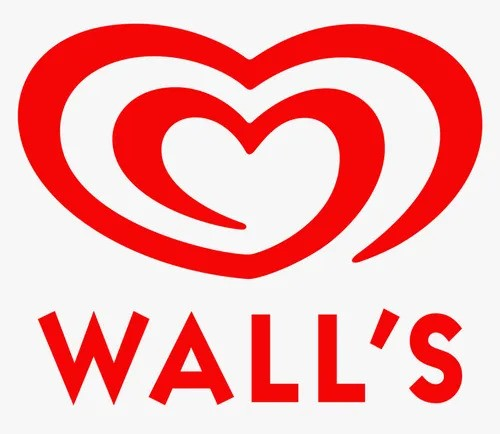

In [ ]:
image_path = "/content/kwality_walls.jpg"  # Path to your image
inputs = preprocess_image(image_path, feature_extractor)
inputs = {k: v.to(device) for k, v in inputs.items()}

In [ ]:
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits

confidence_threshold = 0.7
softmax = torch.nn.Softmax(dim=-1)
probs = softmax(logits).squeeze()
confident_indices = (probs > confidence_threshold).nonzero(as_tuple=True)[0]

# Map indices to class names
class_names = unique_labels
predicted_classes = [class_names[idx] for idx in confident_indices]

# Print results
for idx in confident_indices:
    print(f"Predicted class: {class_names[idx]}, Confidence: {probs[idx].item()}")

print(predicted_classes)

[]
